# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | cidreira
Processing Record 3 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | puerto boyaca
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | kruisfontein
Processing Record 10 of Set 1 | carnarvon
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | mar del plata
Processing Record 13 of Set 1 | hofn
Processing Record 14 of Set 1 | saint-francois
Processing Record 15 of Set 1 | east london
Processing Record 16 of Set 1 | maykain
City not found. Skipping...
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | klaksvik
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | nizhneyansk
City not found. Skipping...
Processing 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port elizabeth,-33.9180,25.5701,71.10,90,0,6.91,ZA,1675807183
1,cidreira,-30.1811,-50.2056,76.33,74,9,10.80,BR,1675807328
2,puerto ayora,-0.7393,-90.3518,85.96,91,28,8.99,EC,1675807340
3,rikitea,-23.1203,-134.9692,78.82,74,84,12.12,PF,1675807340
4,puerto boyaca,5.9758,-74.5885,90.25,54,76,0.38,CO,1675807341


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,71.10,90,0,6.91,ZA,1675807183
1,cidreira,-30.1811,-50.2056,76.33,74,9,10.80,BR,1675807328
2,puerto ayora,-0.7393,-90.3518,85.96,91,28,8.99,EC,1675807340
3,rikitea,-23.1203,-134.9692,78.82,74,84,12.12,PF,1675807340
4,puerto boyaca,5.9758,-74.5885,90.25,54,76,0.38,CO,1675807341


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

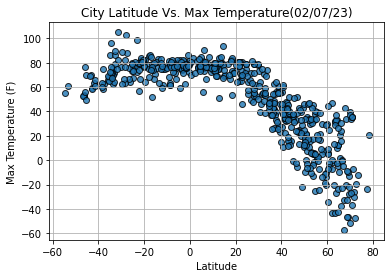

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],
            city_data_df["Max Temp"],
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

###### The Latitude vs. Temperature plot shown above, shows peak values an inflection point at approximately 20 degrees latitude. Latitude values below 20 show no linear relationship with temperature, temperature values remain almost constant around 80 degree Farenheit. Latitude values above 20 show a negative linear relationship with temperature.

#### Latitude Vs. Humidity

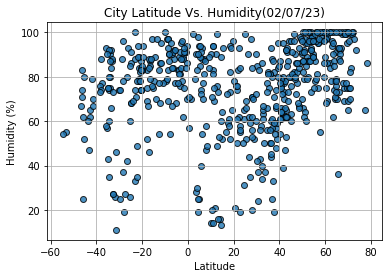

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],
            city_data_df["Humidity"],
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

###### The Latitude vs. Humidty plot shown above shows spread-out distribution of data points. No relationship seems to be happening between humidity and latitude. However, at a first glance it seems that most of the data points have humidity percentages above 50%.

#### Latitude Vs. Cloudiness

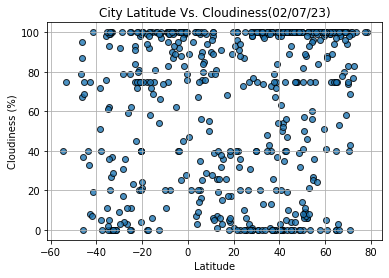

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],
            city_data_df["Cloudiness"],
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

###### The Latitude vs. Coludiness plot shown above does not seem to show a relationship between cloudiness and city latitude. However, it seems that some values for cloudiness show data points concentration at  0, 75, and 100.

#### Latitude vs. Wind Speed Plot

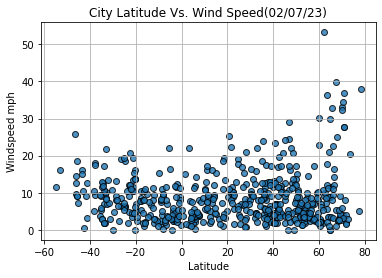

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],
            city_data_df["Wind Speed"],
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Windspeed mph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

###### The Latitude vs. Wind Speed plot does not seem to show any relationship between wind speed and latitude. Most of the wind speed values are below about 30 mph, with only a few values above that wind speed limit.

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [27]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,puerto boyaca,5.9758,-74.5885,90.25,54,76,0.38,CO,1675807341
9,albany,42.6001,-73.9662,38.68,47,100,4.00,US,1675807271
11,hofn,64.2539,-15.2082,32.79,70,100,21.05,IS,1675807352
12,saint-francois,46.4154,3.9054,32.95,82,0,0.00,FR,1675807352
14,longyearbyen,78.2186,15.6401,21.04,86,100,37.98,SJ,1675807079


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,71.10,90,0,6.91,ZA,1675807183
1,cidreira,-30.1811,-50.2056,76.33,74,9,10.80,BR,1675807328
2,puerto ayora,-0.7393,-90.3518,85.96,91,28,8.99,EC,1675807340
3,rikitea,-23.1203,-134.9692,78.82,74,84,12.12,PF,1675807340
5,mataura,-46.1927,168.8643,52.48,83,87,9.78,NZ,1675807341


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.847775222395177


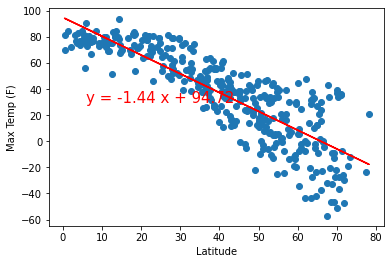

In [28]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
y_label = 'Max Temp (F)'
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

The r-squared is: 0.3638383897445991


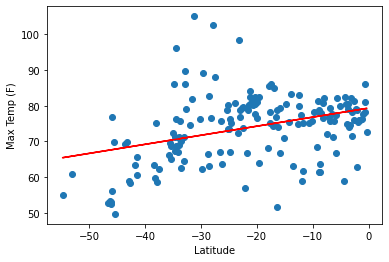

In [29]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
y_label = 'Max Temp (F)'
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

**Discussion about the linear relationship:**
* The Latitude vs. Max Temperature plot for cities in the northern hemisphere is shown above. The max temperature shows a strong negative linear relationship with latitudes in the northern hemisphere, with an r-value of -0.85 for the linear best-fit regression line.
* The Latitude vs. Max Temperature plot for cities in the southern hemisphere is shown above. The max temperature shows a negative linear relationship with latitudes in the sourthern hemisphere, with an r-value of 0.36 for the linear best-fit regression line.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.425967073676983


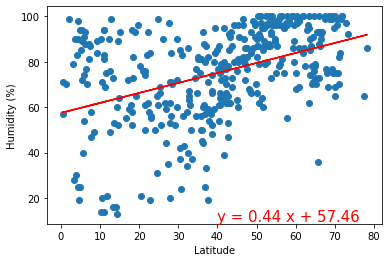

In [30]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
y_label = 'Humidity (%)'
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

The r-squared is: 0.40754442503622756


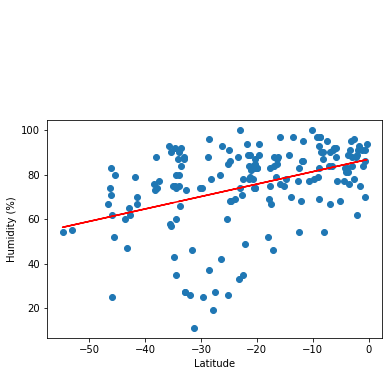

In [31]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
y_label = 'Humidity (%)'
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

**Discussion about the linear relationship:** 
* The Latitude vs. Humidity plot for cities in the northern hemisphere is shown above. The humidity shows a positive linear relationship with latitudes in the northern hemisphere, with an r-value of 0.43 for the linear best-fit regression line.
* The Latitude vs. Humidity plot for cities in the southern hemisphere is shown above. The humidity shows a positive linear relationship with latitudes in the southern hemisphere, with an r-value of 0.41 for the linear best-fit regression line.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.24226282372243801


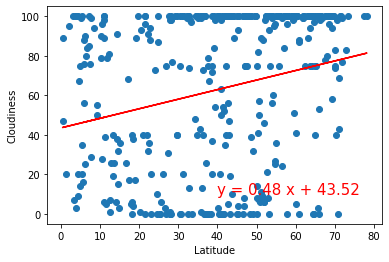

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
y_label = 'Cloudiness'
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: 0.3923340934789033


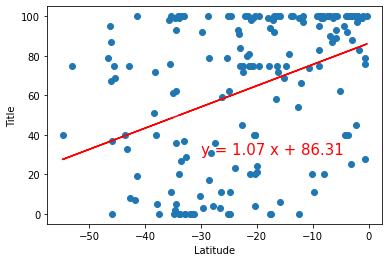

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
y_label = 'Cloudiness'
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:**
* The Latitude vs. Cloudiness plot for cities in the northern hemisphere is shown above. The cloudiness shows a low positive linear relationship with latitudes in the northern hemisphere, with an r-value of 0.24 for the linear best-fit regression line.
* The Latitude vs. Cloudiness plot for cities in the southern hemisphere is shown above. The cloudiness shows a low positive linear relationship with latitudes in the southern hemisphere, with an r-value of 0.39 for the linear best-fit regression line.


### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.15005018980011617


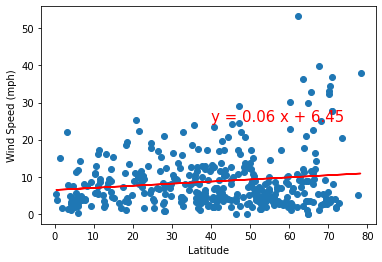

In [33]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
y_label = 'Wind Speed (mph)'
plot_linear_regression(x_values,y_values, 'Windspeed', (40,25))

The r-squared is: -0.343538622235282


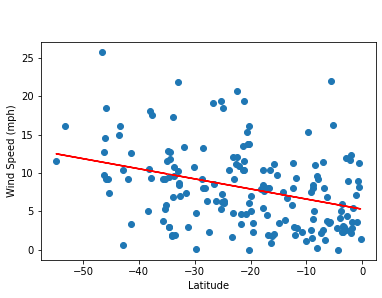

In [34]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
y_label = 'Wind Speed (mph)'
plot_linear_regression(x_values,y_values, 'Windspeed', (-30,30))

**Discussion about the linear relationship:**
* The Latitude vs. Wind Speed plot for cities in the northern hemisphere is shown above. The Wind Speed shows a low positive linear relationship with latitudes in the northern hemisphere, with an r-value of 0.15 for the linear best-fit regression line.
* The Latitude vs. Wind Speed plot for cities in the southern hemisphere is shown above. The Wind Speed shows a low negative linear relationship with latitudes in the sourthern hemisphere, with an r-value of -0.34 for the linear best-fit regression line.